# Electric Motor Tempreature Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import joblib
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [ ]:
df = pd.read_csv('measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17.0
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17.0
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17.0
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17.0
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17.0


In [3]:
df.shape

(4748, 13)

### Analyzing the data

#### Univariate Analysis

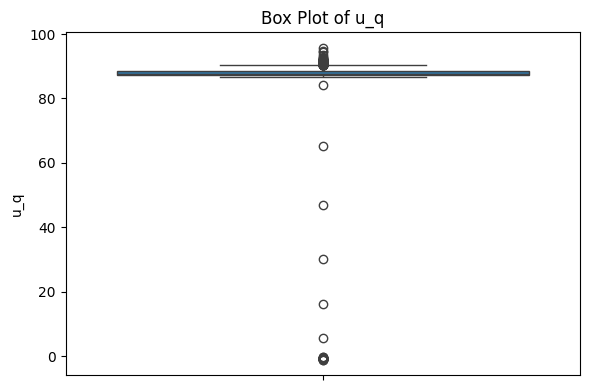

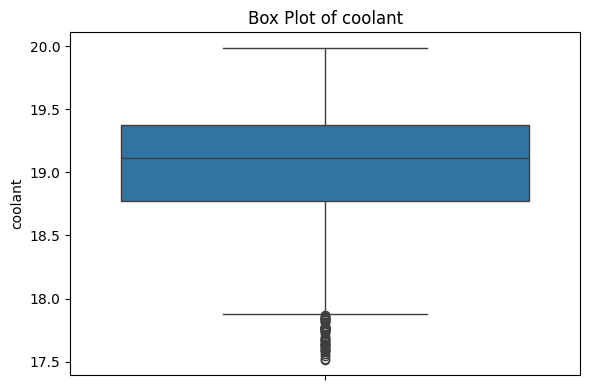

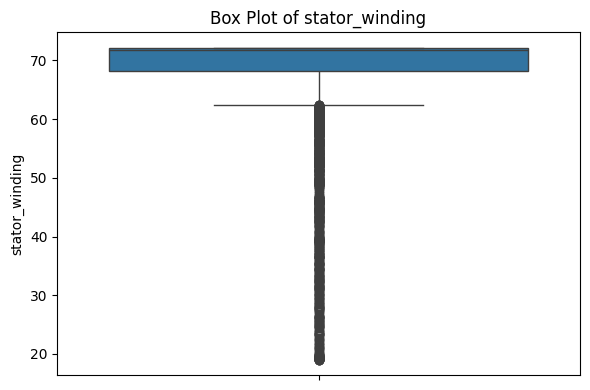

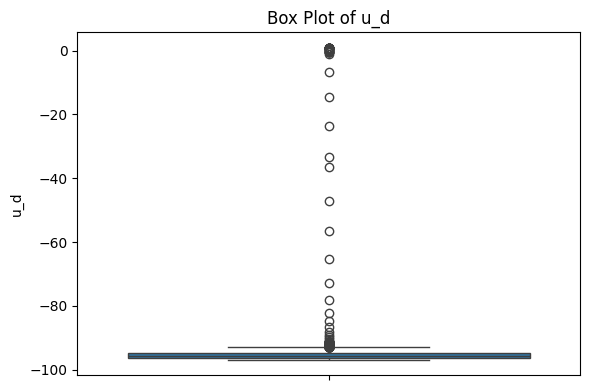

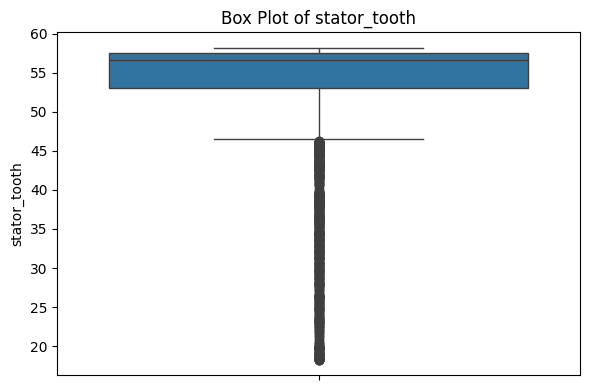

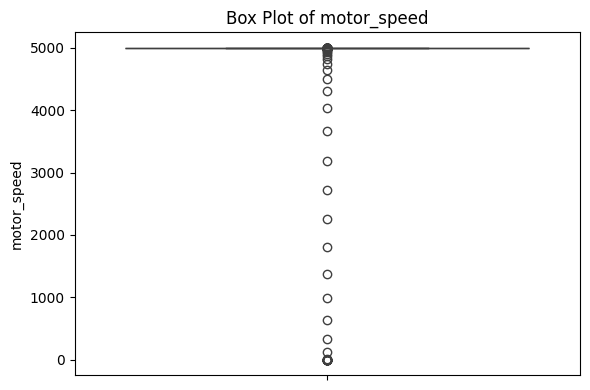

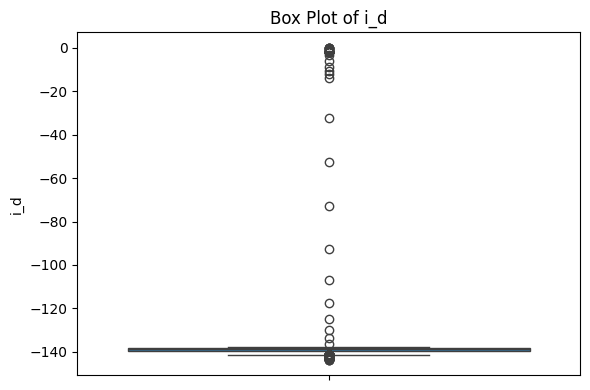

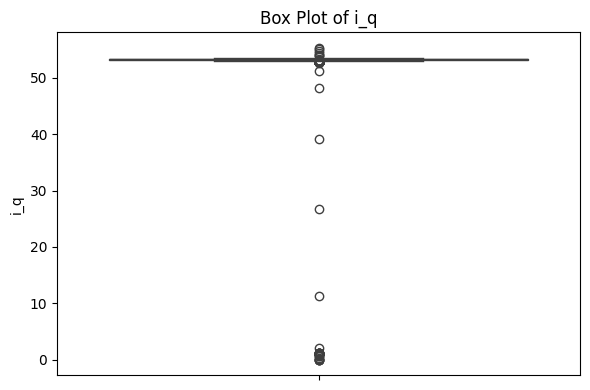

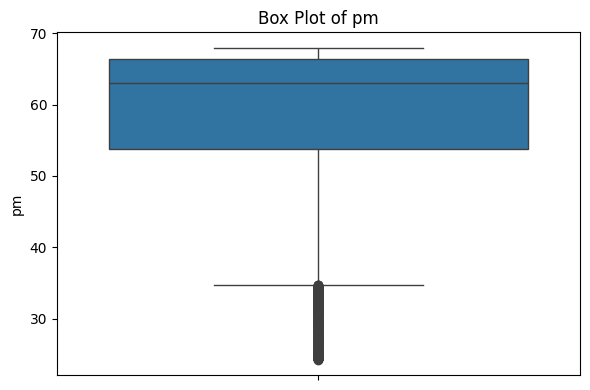

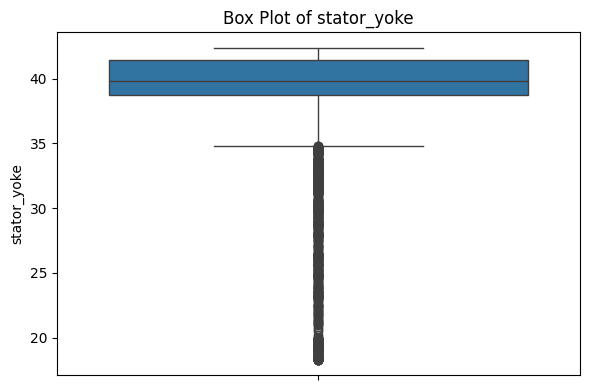

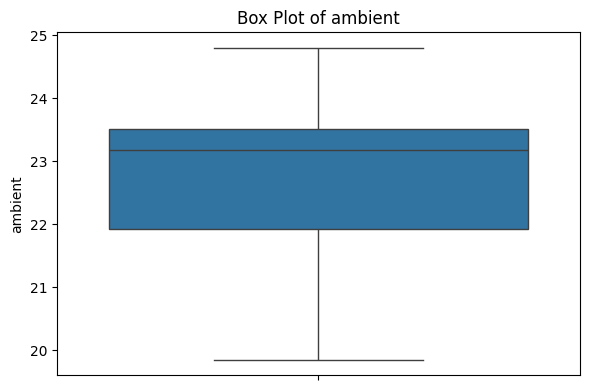

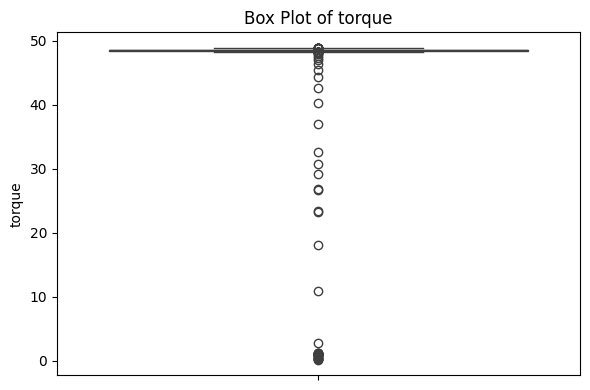

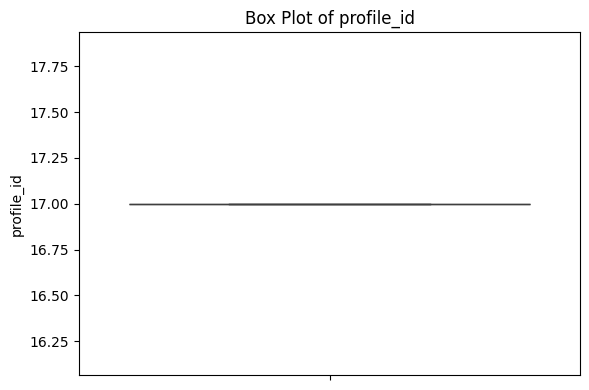

In [4]:
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

#### Multivariate Analysis

<Axes: >

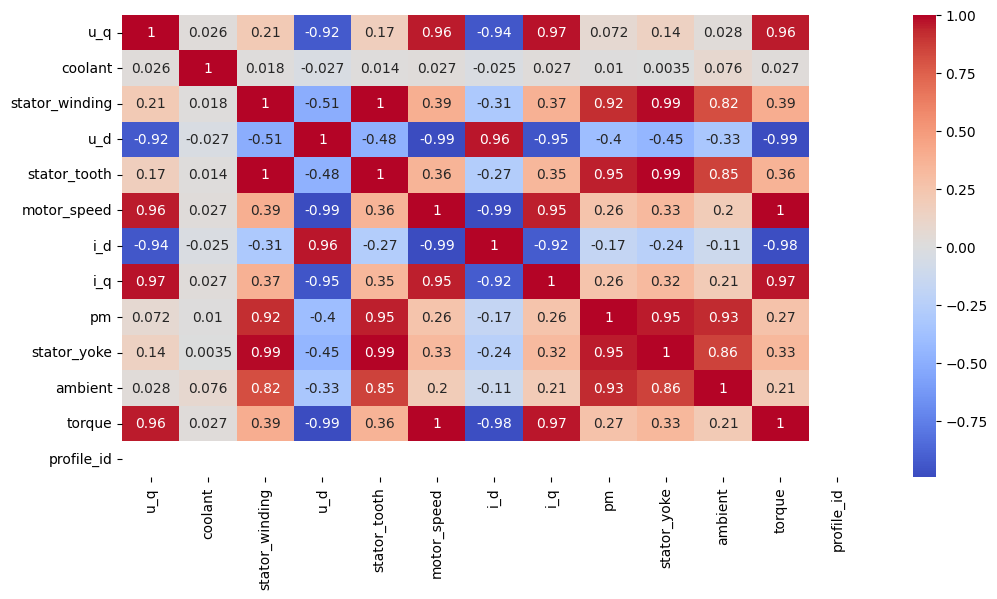

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

The highly correlated features with PM are:  
* profile_id
* stator yoke
* motor_speed
* stator_tooth
* stator_winding
* coolant




#### Descriptive Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   u_q             4748 non-null   float64
 1   coolant         4748 non-null   float64
 2   stator_winding  4748 non-null   float64
 3   u_d             4748 non-null   float64
 4   stator_tooth    4748 non-null   float64
 5   motor_speed     4748 non-null   float64
 6   i_d             4747 non-null   float64
 7   i_q             4747 non-null   float64
 8   pm              4747 non-null   float64
 9   stator_yoke     4747 non-null   float64
 10  ambient         4747 non-null   float64
 11  torque          4747 non-null   float64
 12  profile_id      4747 non-null   float64
dtypes: float64(13)
memory usage: 482.3 KB


In [7]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.000000,4747.0
mean,87.613257,19.045552,67.017233,-94.752414,53.092494,4965.981068,-138.248609,52.985147,58.107651,38.346033,22.707829,48.190746,17.0
std,6.805890,0.454401,10.622578,7.623841,8.378862,395.709611,11.288650,3.874039,11.238558,5.280834,1.241897,3.679728,0.0
min,-0.974433,17.516184,19.049341,-96.798073,18.276365,-0.004142,-143.617004,-0.000785,24.264736,18.300852,19.850620,0.176615,17.0
25%,87.348078,18.772716,68.228830,-96.205196,53.067065,4999.950195,-139.620003,53.215773,53.710955,38.766188,21.926587,48.436804,17.0
50%,87.686459,19.112516,71.726006,-95.820938,56.589745,4999.953613,-138.783905,53.323654,62.985336,39.809078,23.180422,48.500072,17.0
75%,88.594227,19.372823,72.111416,-94.893253,57.545320,4999.956543,-138.490242,53.379776,66.362400,41.422562,23.519061,48.568129,17.0
max,95.686531,19.986029,72.133087,0.851181,58.193741,4999.971191,0.004419,55.308327,67.949631,42.369171,24.802366,48.845245,17.0


### Data Preprocessing

As we have seen in the above in multivariate analysis using heatmap we have created some important features so we will keep them and drop others.

In [8]:
# Dropping the unwanted features
df = df[['profile_id','stator_yoke','motor_speed','stator_tooth','stator_winding','coolant', 'pm']]
df.head()

,profile_id,stator_yoke,motor_speed,stator_tooth,stator_winding,coolant,pm
0,17.0,18.316547,0.002866,18.293219,19.086670,18.805172,24.554214
1,17.0,18.314955,0.000257,18.294807,19.092390,18.818571,24.538078
2,17.0,18.326307,0.002355,18.294094,19.089380,18.828770,24.544693
3,17.0,18.330833,0.006105,18.292542,19.083031,18.835567,24.554018
4,17.0,18.326662,0.003133,18.291428,19.082525,18.857033,24.565397


In [9]:
# checking for null values
df.isnull().sum()

,0
profile_id,1
stator_yoke,1
motor_speed,0
stator_tooth,0
stator_winding,0
coolant,0
pm,1


As we can see there are very less amount of null values so we can drop them.

In [10]:
df.dropna(how='any', axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4747 entries, 0 to 4746
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   profile_id      4747 non-null   float64
 1   stator_yoke     4747 non-null   float64
 2   motor_speed     4747 non-null   float64
 3   stator_tooth    4747 non-null   float64
 4   stator_winding  4747 non-null   float64
 5   coolant         4747 non-null   float64
 6   pm              4747 non-null   float64
dtypes: float64(7)
memory usage: 296.7 KB


In [12]:
# checking for outliers
outlier_info = {}
for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = {
            'num_outliers': outliers.shape[0],
            'outlier_indices': outliers.index.tolist()
        }
for feature, info in outlier_info.items():
    print(f"{feature}: {info['num_outliers']}")

profile_id: 0
stator_yoke: 696
motor_speed: 101
stator_tooth: 698
stator_winding: 728
coolant: 55
pm: 321


As we can see the outliers are very high so deleting them or replacing them may lead to high data loss so we will keep them as it is as it will help in predicting some rare condition.

In [13]:
# Normalizing the data

# First splitting it to X and y variable
X = df.drop(columns='pm', axis=1)
y = df['pm']

sc_x = MinMaxScaler()
X_resample = sc_x.fit_transform(X)

sc_y = MinMaxScaler()
y = y.values.reshape(-1,1)
y_resample = sc_y.fit_transform(y)


In [14]:
# splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state=0, test_size=0.2)

### Model Building

#### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_lr = model_lr.predict(X_test)

#### Decesion Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
y_pred_dt = model_dt.predict(X_test)

#### RandomForest

In [19]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
y_pred_rf = model_rf.predict(X_test)

#### Support Vector Machine

In [21]:
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(X_train, y_train)

SVR()

In [22]:
y_pred_svm = model_svm.predict(X_test)

### Comparing, Evaluating and saving the best model

In [23]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
y_preds = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_svm]

results = []


for name, y_pred in zip(model_names, y_preds):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'R2 Score': round(r2, 4), 'RMSE': round(rmse, 4)})


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
best_model = results_df.loc[0, 'Model']
best_r2 = results_df.loc[0, 'R2 Score']

print(results_df)
print(f"\nBest Model: {best_model} with R2 Score = {best_r2:.4f}")


               Model  R2 Score    RMSE
0      Random Forest    0.9998  0.0033
1      Decision Tree    0.9997  0.0046
2  Linear Regression    0.9770  0.0393
3                SVR    0.9381  0.0645

Best Model: Random Forest with R2 Score = 0.9998


As we can see as per the highest R2 score and lowest rmse score RandomForest is the best model so far

#### Saving the model

In [27]:
joblib.dump(sc_x, 'transform.pkl')
joblib.dump(sc_y,'op_transform.pkl')
joblib.dump(model_rf, 'model.pkl')

['model.pkl']

In [26]:
sample = np.array([17.0, 18.316547, 0.002866, 18.293219, 19.086670, 18.805172]).reshape(1, -1)
sample_scaled = sc_x.transform(sample)
pred_scaled = model_rf.predict(sample_scaled)
pred_original = sc_y.inverse_transform(pred_scaled.reshape(-1, 1))
print(f"Predicted PM: {pred_original[0][0]:.2f}")

Predicted PM: 24.54
